The purpose of this notebook is to try all of the denoising methods and see which one works best. Use the following for loop to test each method on every image in quadrat_photos_subset_for_debugging.

In [2]:
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define a path to the folder that contains the photos I want to test with loops
path = 'quadrat_photos_subset_for_debugging/*'

In [13]:
for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Show each image in its own window.
    cv2.imshow(f'image {i}', img)

# Allows you to close all windows (individually, or close all with ctrl+w)
cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2

### 2D custom filter

In [14]:
# Start convolution by defining a kernel - a 25x25 matrix of all ones. 
kernel = np.ones((3,3), np.float32) / 9
# Alternate option is (5,5) and divided by 25. It makes the images even more blurry.


for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Apply 2D custom filter
    filter_2D = cv2.filter2D(img, -1, kernel)

    # Show each image in its own window.
    cv2.imshow(f'image {i}', filter_2D)

# Allows you to close all windows (individually, or close all with ctrl+w)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Blur

In [15]:

for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Apply blur filter
    img_blur = cv2.blur(img, (3,3))

    # Show each image in its own window.
    cv2.imshow(f'image {i}', img_blur)

# Allows you to close all windows (individually, or close all with ctrl+w)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Gaussian Blur

In [16]:

for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Apply gaussian blur filter
    img_gaussian_blur = cv2.GaussianBlur(img, (3,3), 0)

    # Show each image in its own window.
    cv2.imshow(f'image {i}', img_gaussian_blur)

# Allows you to close all windows (individually, or close all with ctrl+w)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Median Filter
(designed to blur but maintain edges)

In [17]:

for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Apply median filter
    median_filtered_img = cv2.medianBlur(img, 3)

    # Show each image in its own window.
    cv2.imshow(f'image {i}', median_filtered_img)

# Allows you to close all windows (individually, or close all with ctrl+w)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bilateral filter
(designed to blur but maintain edges - generally better than median)

In [18]:

for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Apply bilateral filter
    bilateral_blurred_img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Show each image in its own window.
    cv2.imshow(f'image {i}', bilateral_blurred_img)

# Allows you to close all windows (individually, or close all with ctrl+w)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Non-Local means
Very smudgy, and seems to create artifacts. But seems pretty competent at isolating shapes. It appears to be showing the green and everything else is black and white, or the colors are semi-inverted (yellow flowers appearing blue). What's going on here?

NL means documentation:
https://pydocs.github.io/p/skimage/0.17.2/api/skimage.restoration.non_local_means.denoise_nl_means
https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html

In [3]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte

In [23]:
# BEWARE THIS FOR LOOP IT RUNS FOR A VERY LONG TIME. I'm saving the results in the folder nl_means_denoising_results so I don't have to run it again.

for i, file in enumerate(glob.glob(path)):
    # Read in images in color
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Convert image to a float - necessary here because math will be done on the pixel values
    img = img_as_float(img)

    # estimate the noise standard deviation from the noisy image
    sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

    # Denoise the image based on the sigma that was just found
    denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

    # Convert it back to ubyte
    denoised_ubyte = img_as_ubyte(denoised)

    plt.imsave(f'nl_means_denoising_results/image_{i}.jpg', denoised_ubyte)


I'm going to use the same method on a photo with the spyder color checker.

(array([  9282.,  44016.,  42026.,  81373.,  66011., 109282.,  75116.,
        115720.,  79219., 119460., 118350.,  77555., 110549.,  71212.,
        107493.,  69857., 103994.,  67651., 100133.,  64917.,  94213.,
         94408.,  62220.,  91480.,  60433.,  89324.,  59524.,  89624.,
         59310.,  88359.,  88480.,  59084.,  89130.,  59645.,  89683.,
         60112.,  90408.,  60580.,  93188.,  63599.,  98630., 103110.,
         70156., 102458.,  65893.,  99179.,  66398.,  98313.,  65470.,
         96090.,  94335.,  61851.,  90304.,  58386.,  86406.,  57434.,
         82731.,  54395.,  80800.,  53465.,  79092.,  78804.,  52117.,
         77849.,  52131.,  77375.,  50856.,  74789.,  49250.,  73142.,
         71916.,  47307.,  70643.,  46397.,  68830.,  46051.,  67947.,
         46307.,  76605.,  57575.,  85885.,  72674.,  44894.,  62486.,
         37160.,  50508.,  29965.,  43211.,  32454.,  48355.,  51962.,
         44902.,  68117.,  38989.,  56271.,  41480.,  54829.,  40823.,
      

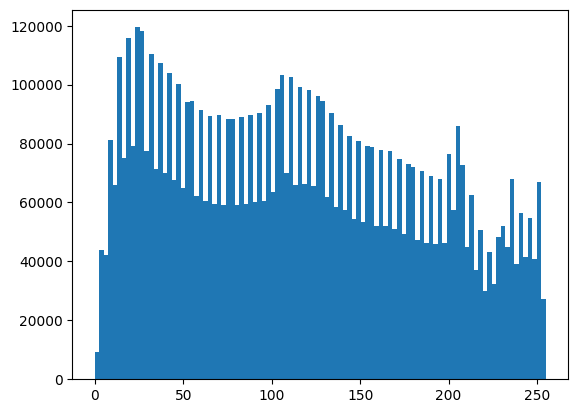

In [10]:
img = cv2.imread('quadrat_photos_raw/20240530_164439.jpg')

# Reduce the image size by half because the windows are too huge.
img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

# Convert image to a float 
img = img_as_float(img)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

# Denoise the image based on the sigma that was just found
denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Convert it back to ubyte
denoised_ubyte = img_as_ubyte(denoised)

# Save the image in the results folder
# plt.imsave(f'nl_means_denoising_results/image_with_color_checker.jpg', denoised_ubyte)



Make a histogram showing the hue, saturation, and value distributions - before and after denoising

(array([4.35286e+05, 0.00000e+00, 2.00000e+00, 6.00000e+00, 1.50000e+01,
        1.70000e+01, 6.85000e+02, 3.10000e+01, 3.69200e+03, 4.62000e+02,
        2.37560e+04, 1.12200e+03, 4.77100e+03, 2.99100e+03, 1.57800e+03,
        1.14921e+05, 1.31400e+03, 1.51400e+03, 1.43300e+03, 4.49000e+02,
        1.77560e+04, 1.23000e+02, 6.40000e+01, 1.25600e+03, 1.04000e+02,
        1.80000e+01, 2.80000e+01, 2.70000e+01, 2.40000e+01, 1.55000e+02,
        2.47089e+05, 5.00000e+00, 6.00000e+00, 4.00000e+00, 1.00000e+01,
        2.00000e+01, 3.59000e+02, 3.00000e+00, 3.64600e+03, 3.40000e+01,
        1.00500e+04, 3.60000e+01, 3.33000e+03, 5.47000e+02, 7.00000e+00,
        3.83720e+04, 6.00000e+01, 3.40100e+03, 5.45000e+03, 3.34200e+03,
        1.40970e+04, 7.26400e+03, 2.90600e+03, 1.78760e+04, 1.49410e+04,
        2.01410e+04, 3.08050e+04, 4.76200e+04, 8.19730e+04, 5.16640e+04,
        1.59396e+05, 1.38450e+04, 1.02510e+04, 8.29700e+03, 6.54500e+03,
        5.29700e+03, 4.68200e+03, 2.87500e+03, 5.02

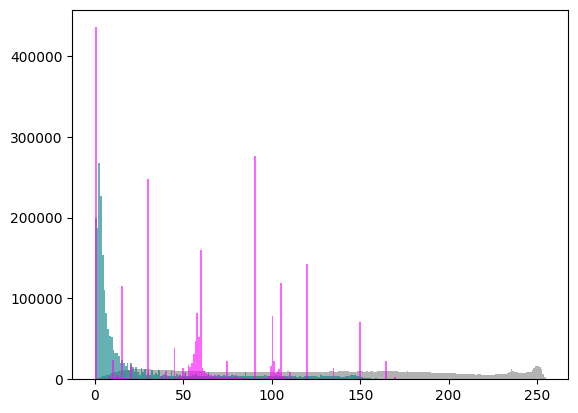

In [12]:
# Convert image to HSV
img = cv2.cvtColor(denoised_ubyte, cv2.COLOR_RGB2HSV)

# Split the HSV image into its channels
hue, saturation, value = cv2.split(img)

# Make a histogram for each channel
plt.hist(value.flatten(), bins=256, color='gray', alpha=.6, label='Value')
plt.hist(saturation.flatten(), bins=256, color='teal', alpha=.6, label='Saturation')
plt.hist(hue.flatten(), bins=180, color='magenta', alpha=.6, label='Hue')


(array([4.35286e+05, 0.00000e+00, 2.00000e+00, 6.00000e+00, 1.50000e+01,
        1.70000e+01, 6.85000e+02, 3.10000e+01, 3.69200e+03, 4.62000e+02,
        2.37560e+04, 1.12200e+03, 4.77100e+03, 2.99100e+03, 1.57800e+03,
        1.14921e+05, 1.31400e+03, 1.51400e+03, 1.43300e+03, 4.49000e+02,
        1.77560e+04, 1.23000e+02, 6.40000e+01, 1.25600e+03, 1.04000e+02,
        1.80000e+01, 2.80000e+01, 2.70000e+01, 2.40000e+01, 1.55000e+02,
        2.47089e+05, 5.00000e+00, 6.00000e+00, 4.00000e+00, 1.00000e+01,
        2.00000e+01, 3.59000e+02, 3.00000e+00, 3.64600e+03, 3.40000e+01,
        1.00500e+04, 3.60000e+01, 3.33000e+03, 5.47000e+02, 7.00000e+00,
        3.83720e+04, 6.00000e+01, 3.40100e+03, 5.45000e+03, 3.34200e+03,
        1.40970e+04, 7.26400e+03, 2.90600e+03, 1.78760e+04, 1.49410e+04,
        2.01410e+04, 3.08050e+04, 4.76200e+04, 8.19730e+04, 5.16640e+04,
        1.59396e+05, 1.38450e+04, 1.02510e+04, 8.29700e+03, 6.54500e+03,
        5.29700e+03, 4.68200e+03, 2.87500e+03, 5.02

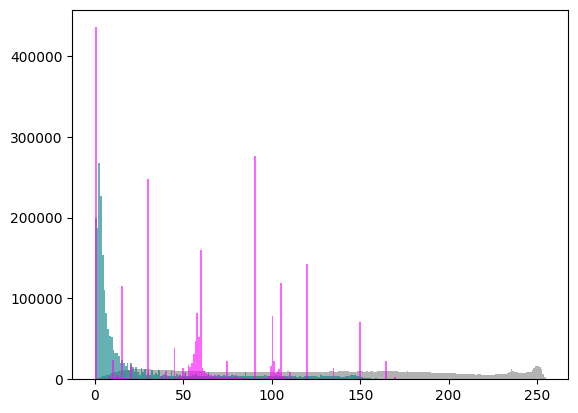

In [11]:
# Convert image to HSV
img_hsv = cv2.cvtColor(denoised_ubyte, cv2.COLOR_RGB2HSV)

# Split the HSV image into its channels
hue, saturation, value = cv2.split(img_hsv)

# Make a histogram for each channel
plt.hist(value.flatten(), bins=256, color='gray', alpha=.6, label='Value')
plt.hist(saturation.flatten(), bins=256, color='teal', alpha=.6, label='Saturation')
plt.hist(hue.flatten(), bins=180, color='magenta', alpha=.6, label='Hue')


They're the same?? Is there a bug?